In [1]:
import pandas as pd

# Dataset 1: Walmart Sales Data

## 1. Total sale units by date

Firstly, we want to look at the total sales in each day. To do it, we use the combination of **calendar.csv** and **sales_train_validation.csv** files to extract the information about date and sales for each day. The total sales below are in unit, not accounting for prices.

In [2]:
calendar_data = pd.read_csv('walmart_sales_data/calendar.csv')
calendar_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [3]:
evaluation_data = pd.read_csv('walmart_sales_data/sales_train_validation.csv')
evaluation_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
for index, row in calendar_data.iterrows():
    if row["d"] not in evaluation_data:
        continue
    total_sales = evaluation_data[row["d"]].sum()
    calendar_data.loc[index, "total_sales"] = total_sales
calendar_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,total_sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631.0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749.0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783.0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412.0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146.0


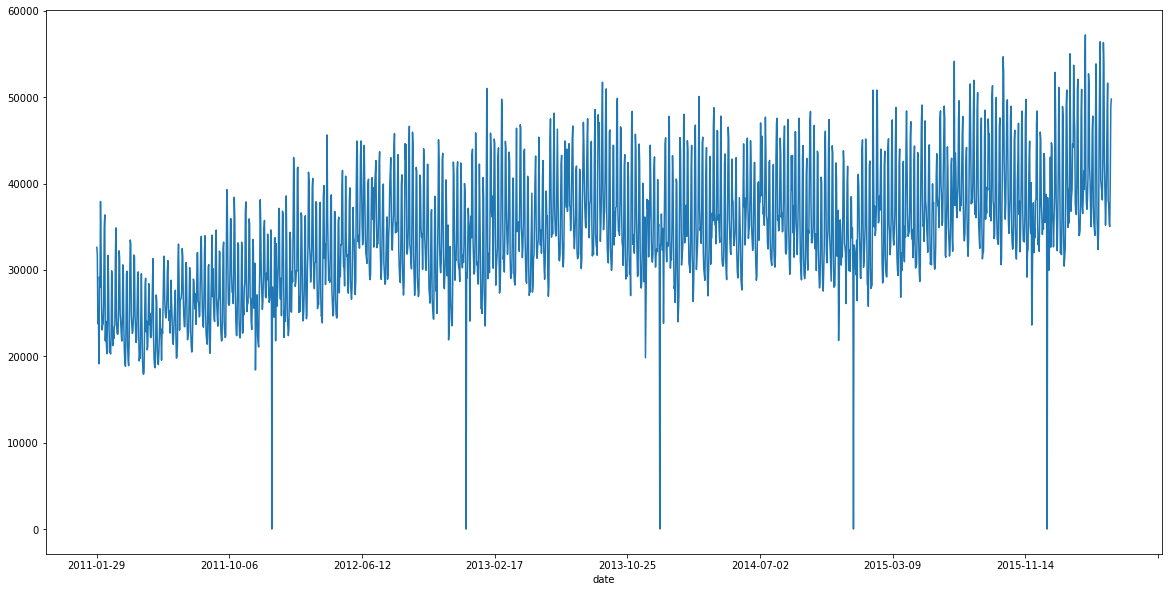

In [5]:
calendar_data.set_index('date').total_sales.plot(figsize=(20, 10))

**Takeaway**: The overall sales increase through time. There is a sudden drop in one period each year. To examine it, we will take a look at the lowest value in sales.

In [6]:
calendar_data.nsmallest(n=5, columns=['total_sales'])

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,total_sales
696,2012-12-25,11248,Tuesday,4,12,2012,d_697,Christmas,National,NaN,NaN,0,0,0,11.0
330,2011-12-25,11148,Sunday,2,12,2011,d_331,Christmas,National,NaN,NaN,0,0,0,13.0
1791,2015-12-25,11547,Friday,7,12,2015,d_1792,Christmas,National,NaN,NaN,0,0,0,14.0
1061,2013-12-25,11348,Wednesday,5,12,2013,d_1062,Christmas,National,NaN,NaN,0,0,0,20.0
1426,2014-12-25,11447,Thursday,6,12,2014,d_1427,Christmas,National,NaN,NaN,0,0,0,20.0


**Takeaway**: So we see that Chrismas days have the lowest sales among all. Next, we want to take a look at sales in different state, specifically CA, TX, WI.

### 1.1 Sales by states

In [7]:
for index, row in calendar_data.iterrows():
    if row["d"] not in evaluation_data:
        continue
    total_sales_CA = evaluation_data[evaluation_data["state_id"] == "CA"][row["d"]].sum()
    total_sales_TX = evaluation_data[evaluation_data["state_id"] == "TX"][row["d"]].sum()
    total_sales_WI = evaluation_data[evaluation_data["state_id"] == "WI"][row["d"]].sum()
    calendar_data.loc[index, "total_sales_CA"] = total_sales_CA
    calendar_data.loc[index, "total_sales_TX"] = total_sales_TX
    calendar_data.loc[index, "total_sales_WI"] = total_sales_WI
calendar_data.head()

KeyboardInterrupt: 

In [ ]:
calendar_data.set_index('date').plot(y=["total_sales_CA", "total_sales_TX", "total_sales_WI"] ,figsize=(20, 10))

This plot is not very clear to see but we know that sale in CA was the highest. Sales in WI was lowest among all in the beginning but caught up wiht TX in the end of the data. 

In [ ]:
calendar_data.set_index('date').loc['2012-01-01':'2012-12-31'].plot(y=["total_sales_CA", "total_sales_TX", "total_sales_WI"] ,figsize=(20, 10))

The detailed plot above shows that three states follow the common trend in sales. Next, we inspect the sales in categories.

### 1.2 Sales by categories

In [ ]:
catagories = evaluation_data['cat_id'].unique()
print('Catagories', catagories)

In [ ]:
for index, row in calendar_data.iterrows():
    if row["d"] not in evaluation_data:
        continue
    calendar_data.loc[index, "total_sales_HOBBIES"] = evaluation_data[evaluation_data["cat_id"] == "HOBBIES"][row["d"]].sum()
    calendar_data.loc[index, "total_sales_HOUSEHOLD"] = evaluation_data[evaluation_data["cat_id"] == "HOUSEHOLD"][row["d"]].sum()
    calendar_data.loc[index, "total_sales_FOODS"] = evaluation_data[evaluation_data["cat_id"] == "FOODS"][row["d"]].sum()
calendar_data.head()

In [ ]:
calendar_data.set_index('date').plot(y=["total_sales_HOBBIES", "total_sales_HOUSEHOLD", "total_sales_FOODS"] ,figsize=(20, 10))

So the most items sold is in foods. And we see that the is a increase trend in foods and house hold sales, while hobbies' sales is consistent. Next, we take a close up look to most recent sales in categories.

In [ ]:
calendar_data.set_index('date').loc['2015-01-01':].plot(y=["total_sales_HOBBIES", "total_sales_HOUSEHOLD", "total_sales_FOODS"] ,figsize=(20, 10))

There is not much to tell about most recent sales but the increasing trend in foods' sales.

## 2. Total sales with prices by date

Firstly, we need to translate the sales of **sales_train_validation.csv** file that accomodates for the price in **sell_prices.csv** file. But, we get the problem that the prices change weekly and they are different between stores. There are six stores in total.

In [ ]:
stores = evaluation_data['store_id'].unique()
print('Stores', stores)

Below shows how prices change every week in a 4 different stores in CA. 

In [ ]:
import matplotlib.pyplot as plt
sell_prices_data = pd.read_csv('walmart_sales_data/sell_prices.csv')
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.8)
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[0,0], color="r", title="CA_1")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_2")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[0,1], color="b", title="CA_2")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_3")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[1,0], color="g", title="CA_3")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_4")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[1,1], color="y", title="CA_4")

Although the problem seems complicated, we can tackle this by delicately translate prices and sales from **calendar.csv**, **sales_train_validation.csv** and **sell_prices.csv** files. But this process took alot of time so we did complete it.

In [ ]:
# evaluation_with_prices_data = evaluation_data.copy()
# for e_index, e_row in evaluation_with_prices_data.iterrows():
#     store_id = e_row["store_id"]
#     item_id = e_row["item_id"]
#     for c_index, c_row in calendar_data.iterrows():
#         d = c_row["d"]
#         wm_yr_wk = c_row["wm_yr_wk"]
#         sell_price = sell_prices_data[(sell_prices_data['store_id'] == store_id) & (sell_prices_data['item_id'] == item_id) & (sell_prices_data['wm_yr_wk'] == wm_yr_wk)]
#         if sell_price.empty:
#             continue
#         evaluation_with_prices_data.loc[e_index, d] = evaluation_with_prices_data.loc[e_index, d]*sell_price

## 3. Total sales by weekdays

Next, we want to see how the business performed during the week by plotting the sales by weekday.

In [ ]:
weekdays = calendar_data['weekday'].unique()
print('Weekdays', weekdays)

In [ ]:
calendar_data.groupby(['weekday']).sum().sort_values(by=['total_sales']).plot(kind='bar', y='total_sales', figsize=(20, 10))

We can clearly see that weekends have the highest sale maybe because people were off from work. Also Wednesday has the least sales maybe because it is the middle of the week.

## 4. Total sales by events

Next, we want to see how the business performed during the holidays.

In [ ]:
event_name_1 = calendar_data['event_name_1'].unique()
print('Events', event_name_1)

In [ ]:
calendar_data.groupby(['event_name_1']).sum().sort_values(by=['total_sales']).plot(kind='bar', y='total_sales', figsize=(20, 10))

**Takeaway**: Sales perform best durring the SuperBowl and worst during Christmas

In [ ]:
event_type_1 = calendar_data['event_type_1'].unique()
print('Event types', event_type_1)

In [ ]:
calendar_data.groupby(['event_type_1']).sum().sort_values(by=['total_sales']).plot(kind='bar', y='total_sales', figsize=(20, 10))

**Takeaway**: However, sales perform worst in sports events and best in religous events.

### 4. 1. With categories

In [ ]:
calendar_data.groupby(['event_name_1']).sum().sort_values(by=['total_sales']).plot(kind='bar', y=["total_sales_HOBBIES", "total_sales_HOUSEHOLD", "total_sales_FOODS"], stacked=True, figsize=(20, 10))

In [ ]:
calendar_data.groupby(['event_type_1']).sum().sort_values(by=['total_sales']).plot(kind='bar', y=["total_sales_HOBBIES", "total_sales_HOUSEHOLD", "total_sales_FOODS"], stacked=True, figsize=(20, 10))

**Takeaway**: We see a large increase in food sales during the SuperBowl.

## 5. Total sales by months

In [ ]:
calendar_data.groupby(['month']).sum().plot(kind='bar', y='total_sales', figsize=(20, 10))

**Takeaway**: From the plot we might can say that sales is good during the Spring. But in the end of the year, on November and December, it is low.

### 5. 1. With categories

In [ ]:
calendar_data.groupby(['month']).sum().plot(kind='bar', y=["total_sales_HOBBIES", "total_sales_HOUSEHOLD", "total_sales_FOODS"], stacked=True, figsize=(20, 10))

## 6 Sales by categories and states

In [ ]:
for index, row in calendar_data.iterrows():
    if row["d"] not in evaluation_data:
        continue
    calendar_data.loc[index, "total_sales_CA_HOBBIES"] = evaluation_data[(evaluation_data["cat_id"] == "HOBBIES") & (evaluation_data["state_id"] == "CA")][row["d"]].sum()
    calendar_data.loc[index, "total_sales_TX_HOBBIES"] = evaluation_data[(evaluation_data["cat_id"] == "HOBBIES") & (evaluation_data["state_id"] == "TX")][row["d"]].sum()
    calendar_data.loc[index, "total_sales_WI_HOBBIES"] = evaluation_data[(evaluation_data["cat_id"] == "HOBBIES") & (evaluation_data["state_id"] == "WI")][row["d"]].sum()
    calendar_data.loc[index, "total_sales_CA_HOUSEHOLD"] = evaluation_data[(evaluation_data["cat_id"] == "HOUSEHOLD") & (evaluation_data["state_id"] == "CA")][row["d"]].sum()
    calendar_data.loc[index, "total_sales_TX_HOUSEHOLD"] = evaluation_data[(evaluation_data["cat_id"] == "HOUSEHOLD") & (evaluation_data["state_id"] == "TX")][row["d"]].sum()
    calendar_data.loc[index, "total_sales_WI_HOUSEHOLD"] = evaluation_data[(evaluation_data["cat_id"] == "HOUSEHOLD") & (evaluation_data["state_id"] == "WI")][row["d"]].sum()
    calendar_data.loc[index, "total_sales_CA_FOODS"] = evaluation_data[(evaluation_data["cat_id"] == "FOODS") & (evaluation_data["state_id"] == "TX")][row["d"]].sum()
    calendar_data.loc[index, "total_sales_TX_FOODS"] = evaluation_data[(evaluation_data["cat_id"] == "FOODS") & (evaluation_data["state_id"] == "TX")][row["d"]].sum()
    calendar_data.loc[index, "total_sales_WI_FOODS"] = evaluation_data[(evaluation_data["cat_id"] == "FOODS") & (evaluation_data["state_id"] == "WI")][row["d"]].sum()
calendar_data.head()

## 7. Save the data to file

In [ ]:
calendar_data.to_csv('walmart_sales_data/preprocessed/calendar_processed.csv')